In [171]:
#Autoreload to be able to tweak source code in the fly without restarting kernel
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
%autoreload 2

In [173]:
import aligater as ag

In [174]:
fcsList=ag.collectFiles("/media/ludvig/Project_Storage/GAIM/data/GAIM_fcs/", lFilter=["T cells"])

Collected 3091 files, 6278 files did not pass filter(s) and mask(s).


In [175]:
fcs = ag.loadFCS(fcsList[1], return_type="AGsample")

Opening file T cells_D9_D09_072 from folder /01-03-2016/plate 1
Loaded dataset with 500000 events.
Marker labels: CD39 CD127 CD45RO CD25 CD45RA CD3 CD194 CD4 


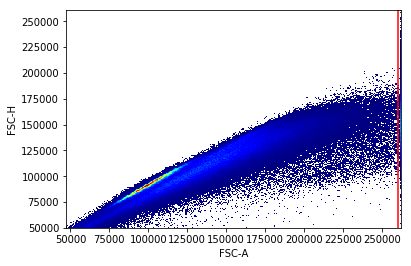

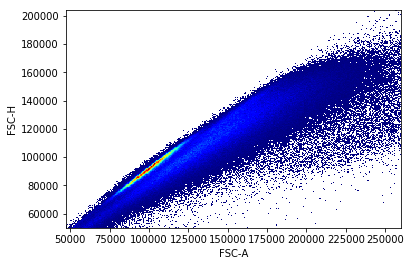

After gating, 488168 out of 500000 events remain.


In [176]:
no_clutter=ag.gateThreshold(fcs(),"FSC-A", "FSC-H",thresh=260000, orientation='vertical',population="lower")

After gating, 478080 out of 488168 events remain.


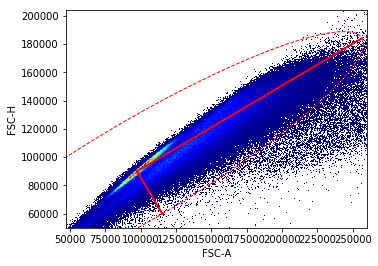

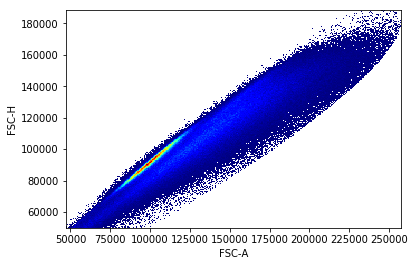

In [177]:
singlets=ag.gatePC(fcs(),"FSC-A", "FSC-H",center='density',widthScale=4, heightScale=4, vI=no_clutter, plot=True)

In [178]:
fcs.update(ag.AGgate(singlets, fcs.full_index()),"singlets")

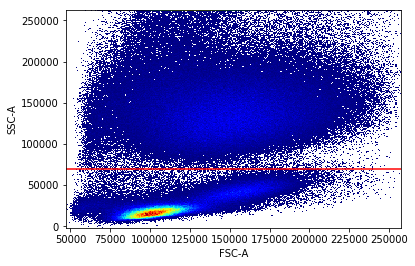

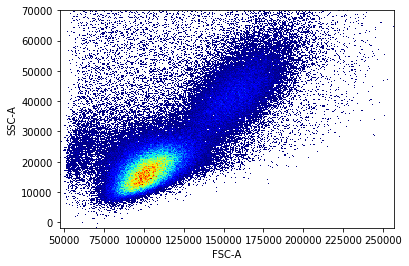

After gating, 188353 out of 478080 events remain.


In [179]:
PBMCstep1=ag.gateThreshold(fcs(),xCol="FSC-A",yCol="SSC-A",vI=singlets, orientation="horisontal",thresh=70000,population="lower")

After gating, 175023 out of 188353 events remain.


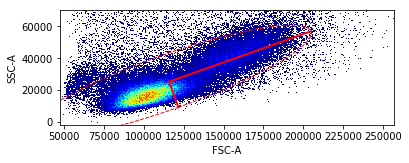

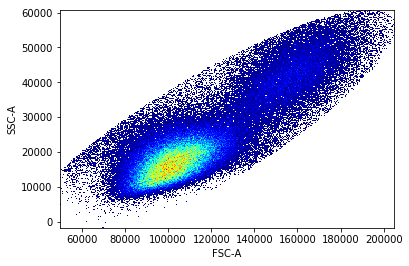

In [180]:
PBMC=ag.gatePC(fcs(),"FSC-A","SSC-A",center='centroid',widthScale=3, heightScale=2, vI=PBMCstep1, plot=True)

In [181]:
fcs.update(ag.AGgate(PBMC, singlets),"PBMC")

(<matplotlib.figure.Figure at 0x7fa951790dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa951778470>)

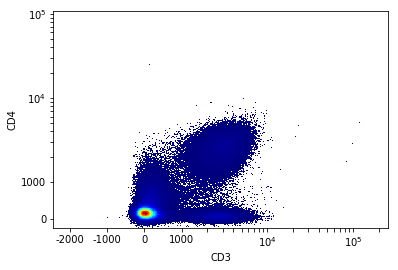

In [182]:
ag.plotHeatmap(fcs(),"CD3","CD4",singlets, scale='logish')

In [183]:
ylim=ag.valleySeek(fcs(),"CD4",vI=PBMC,interval=[0,1000],scale='logish')
ylim

995.51904121993698

Input quadgate solution score: 6.34158160694
Tested 20 solution(s) excluding the input solution
Best solution had score: 6.34158160694


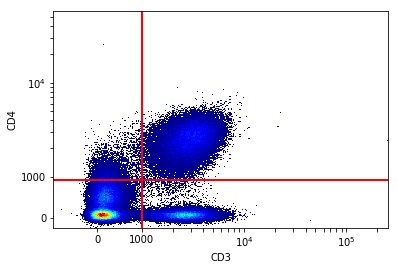

In [221]:
tmp1, CD4pos, CD4neg, tmp2, solution=ag.variableQuadGate(fcs(),"CD3","CD4",vI=PBMC,scale='logish',threshList=[1000,1000,ylim,ylim],testRange=[0,1000],position='right',scoreThresh=0.9)

(<matplotlib.figure.Figure at 0x7fa952ecc588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa952eb57b8>)

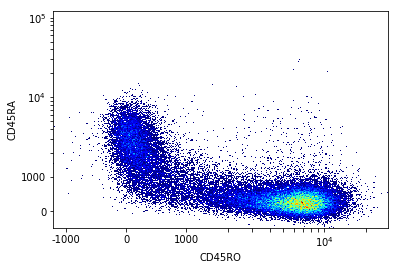

In [185]:
ag.plotHeatmap(fcs(), "CD45RO", "CD45RA",CD4pos, scale='logish')

In [186]:
def CD4gate(vI):
    xlim=ag.valleySeek(fcs(),"CD45RO",vI,interval=[500,2000],scale='logish')
    ylim=ag.valleySeek(fcs(), "CD45RA",vI,interval=[500,2000],scale='logish')
    solution=ag.variableQuadGate(fcs(),"CD45RO","CD45RA",vI=vI,scale='logish',threshList=[xlim,xlim,ylim,ylim],testRange=[500,1500],position='left',only_solution=True)
    naiveCD4, tmp1, memoryCD4, tmp2, solution=ag.variableQuadGate(fcs(),"CD45RO","CD45RA",vI=vI,scale='logish',threshList=solution,testRange=[500,1500],position='right',only_solution=False)
    return naiveCD4, memoryCD4

Figure something out

Input quadgate solution score: 1.86749213544
Tested 20 solution(s) excluding the input solution
Best solution had score: 1.85520811414


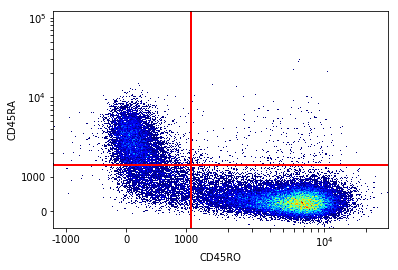

Input quadgate solution score: 1.85520811414
Tested 20 solution(s) excluding the input solution
Best solution had score: 1.82115469011


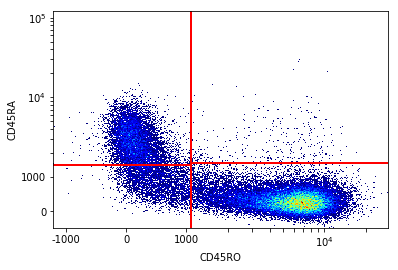

In [187]:
naiveCD4pos,memoryCD4pos = CD4gate(CD4pos)

Input quadgate solution score: 1.61866293926
Tested 20 solution(s) excluding the input solution
Best solution had score: 1.54568962546


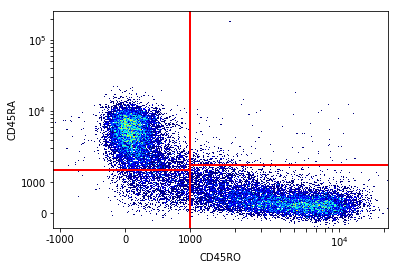

Input quadgate solution score: 1.54568962546
Tested 20 solution(s) excluding the input solution
Best solution had score: 1.54568962546


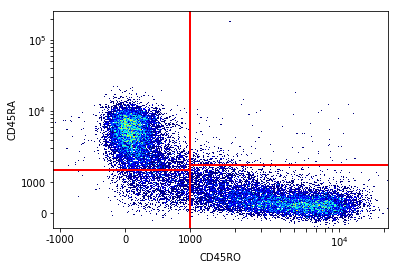

In [188]:
naiveCD4neg,memoryCD4neg = CD4gate(CD4neg)

In [189]:
def FMOCD39(vI):
    output=ag.gateThreshold(fcs(), "CD39","FSC-H",vI=vI,orientation='vertical', scale='logish',thresh=600,population='upper')
    return output

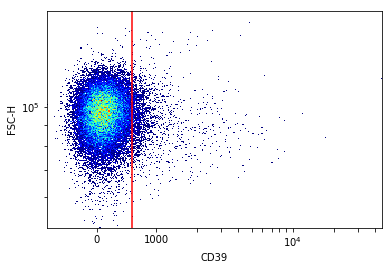

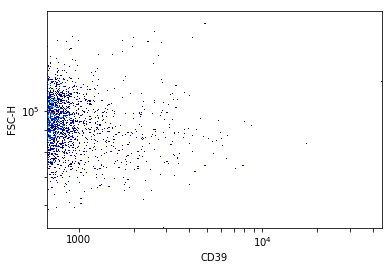

After gating, 2626 out of 38469 events remain.


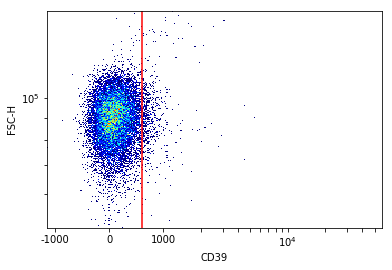

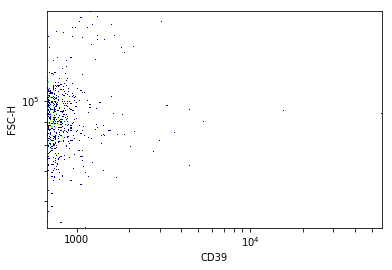

After gating, 876 out of 17057 events remain.


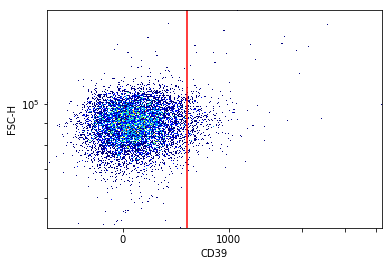

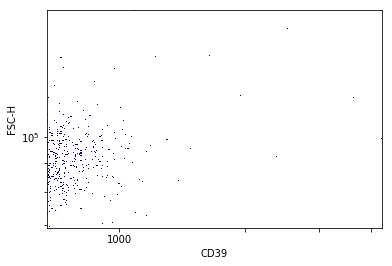

After gating, 513 out of 10823 events remain.


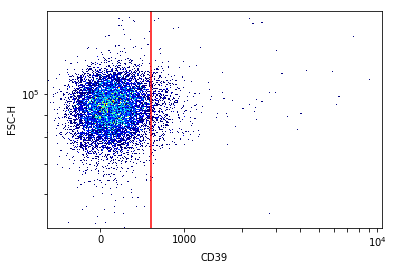

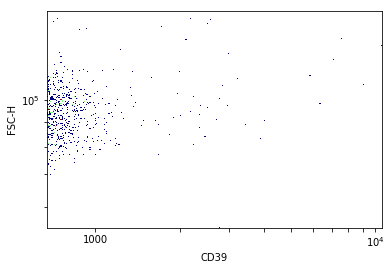

After gating, 801 out of 13877 events remain.


In [190]:
CD39posMemoryCD4pos = FMOCD39(memoryCD4pos)
CD39posMemoryCD4neg = FMOCD39(memoryCD4neg)
CD39posNaiveCD4pos = FMOCD39(naiveCD4pos)
CD39posNaiveCD4neg = FMOCD39(naiveCD4neg)

Back to CD4pos again

(<matplotlib.figure.Figure at 0x7fa95286a518>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa952574898>)

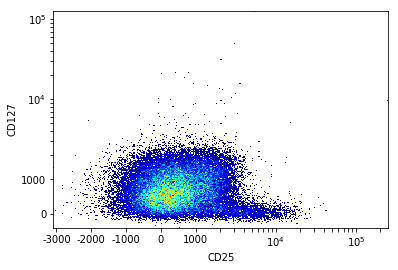

In [191]:
ag.plotHeatmap(fcs(),"CD25","CD127",CD4pos,scale='logish')

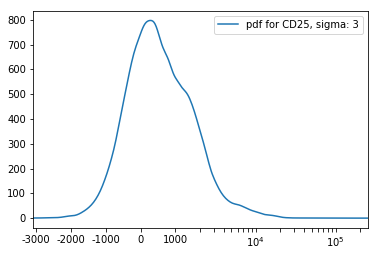

In [192]:
ag.plot_densityFunc(fcs(),"CD25",CD4pos, scale='logish')

In [193]:
mean, sigma, maxVal = ag.axisStats(fcs(),"CD25",CD4pos)

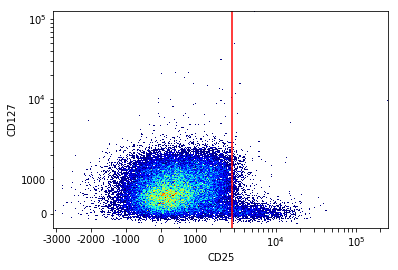

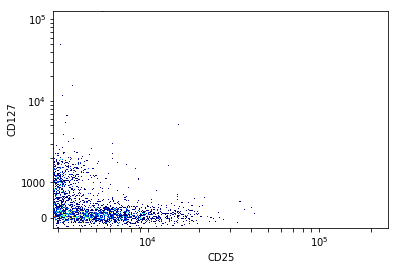

After gating, 3194 out of 55043 events remain.


In [194]:
CD25step1=ag.gateThreshold(fcs(),"CD25","CD127",vI=CD4pos,orientation='vertical',thresh=mean+sigma,scale='logish')

Rework to half-gaussian estimation

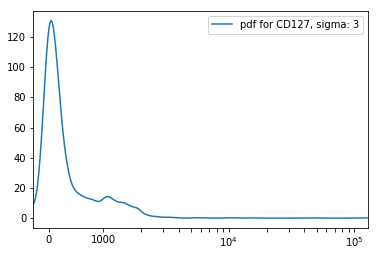

In [195]:
ag.plot_densityFunc(fcs(),"CD127",CD25step1,scale='logish')

In [196]:
ylim=ag.valleySeek(fcs(),"CD127",vI=CD25step1,interval=[500,1000],scale='logish')

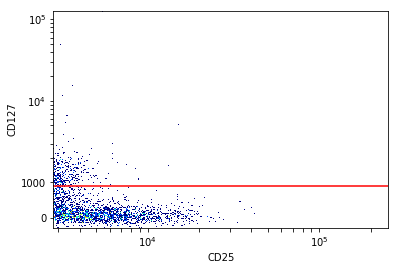

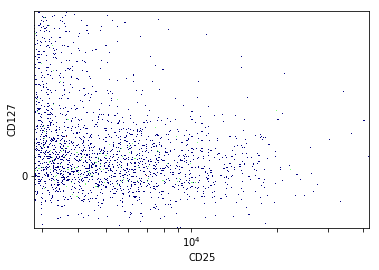

After gating, 2747 out of 3194 events remain.


In [197]:
Tregs=ag.gateThreshold(fcs(),"CD25","CD127",vI=CD25step1,orientation='horisontal',population='lower',thresh=ylim,scale='logish')

(<matplotlib.figure.Figure at 0x7fa95c010978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa95180a1d0>)

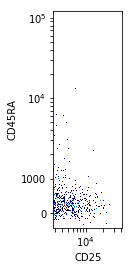

In [198]:
ag.plotHeatmap(fcs(),"CD25","CD45RA",Tregs,scale='logish',aspect='equal')

In [199]:
mean,sigma,maxval=ag.axisStats(fcs(),"CD45RA",Tregs)

In [200]:
sigma

2480.351712049428

In [201]:
mean

528.97479812580104

In [202]:
maxval

202.05398563140324

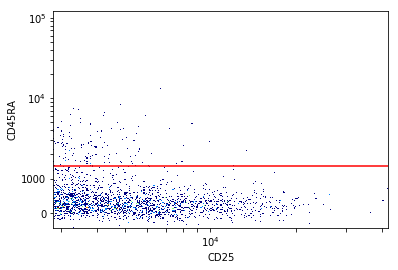

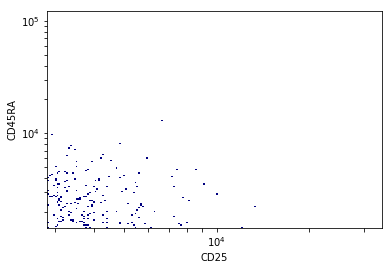

After gating, 176 out of 2747 events remain.


In [203]:
activatedTreg = ag.gateThreshold(fcs(),"CD25","CD45RA",vI=Tregs, thresh = maxval+0.5*sigma, population='upper',scale='logish')

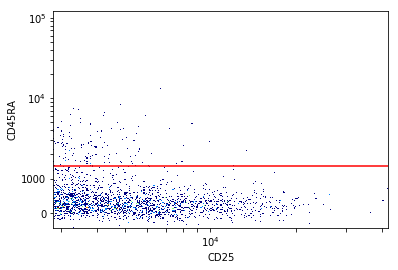

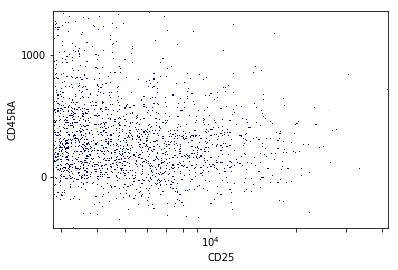

After gating, 2571 out of 2747 events remain.


In [204]:
bottomTreg = ag.gateThreshold(fcs(),"CD25","CD45RA",vI=Tregs, thresh = maxval+0.5*sigma, population='lower',scale='logish')

In [205]:
mean, sigma, maxval=ag.axisStats(fcs(),"CD25",bottomTreg)

In [206]:
mean

6130.0158048561607

In [207]:
sigma

3896.9821736839781

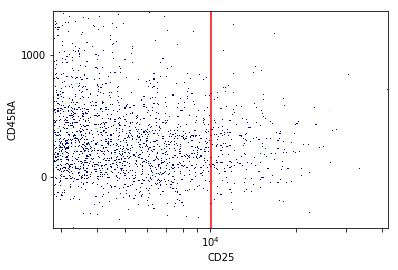

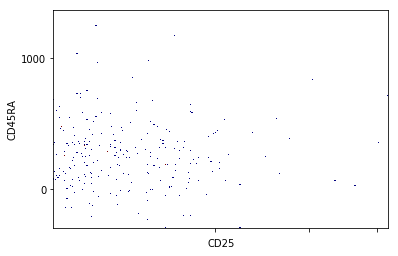

After gating, 319 out of 2571 events remain.


In [208]:
secretingTreg=ag.gateThreshold(fcs(),"CD25","CD45RA",thresh=mean+sigma ,vI=bottomTreg,scale='logish',population='upper',orientation='vertical')

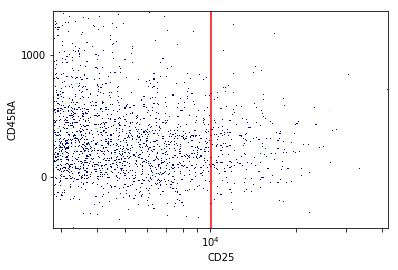

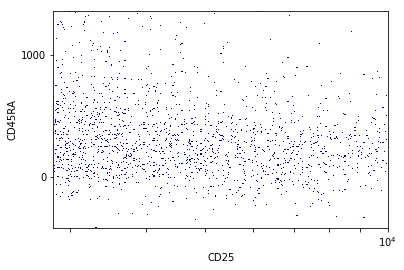

After gating, 2252 out of 2571 events remain.


In [209]:
restingTreg=ag.gateThreshold(fcs(),"CD25","CD45RA",thresh=mean+sigma ,vI=bottomTreg,scale='logish',population='lower',orientation='vertical')

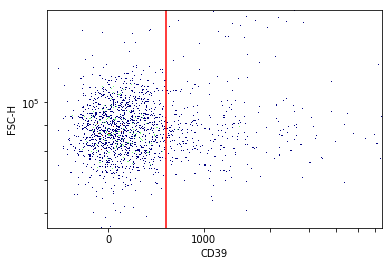

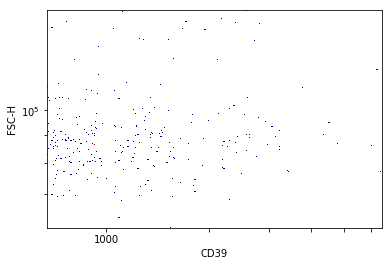

After gating, 381 out of 2252 events remain.


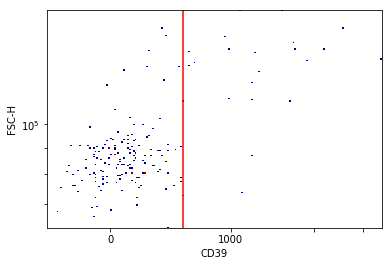

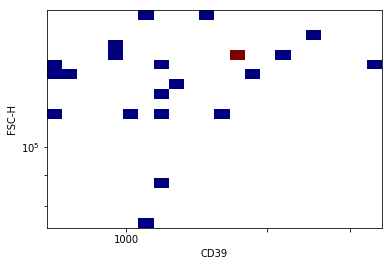

After gating, 22 out of 176 events remain.


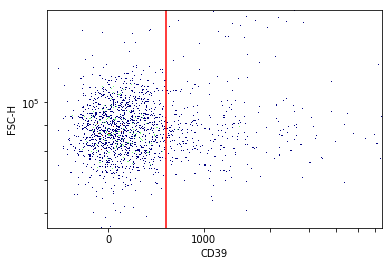

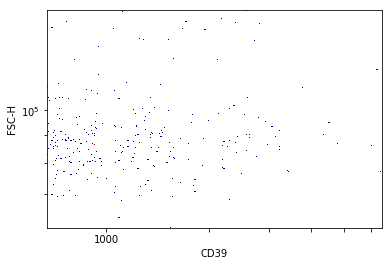

After gating, 381 out of 2252 events remain.


In [210]:
CD39secretingTreg = FMOCD39(secretingTreg)
CD39activatedTreg = FMOCD39(activatedTreg)
CD39restingTreg = FMOCD39(restingTreg)

Another branch from Tregs

(<matplotlib.figure.Figure at 0x7fa952df8dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa95bff6e80>)

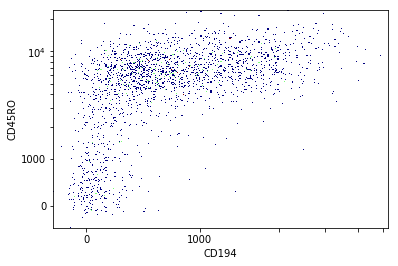

In [211]:
ag.plotHeatmap(fcs(),"CD194","CD45RO",Tregs, scale='logish')

In [212]:
mean, sigma, maxval=ag.axisStats(fcs(),"CD45RO",Tregs)
[mean, sigma, maxval]

[6233.1527676945425, 3796.4765787468041, 6047.091804657317]

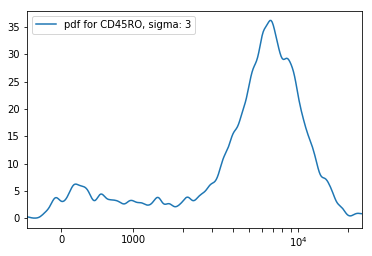

In [213]:
ag.plot_densityFunc(fcs(),"CD45RO",vI=Tregs,scale='logish')

In [214]:
maxval

6047.091804657317

In [222]:
mean, sigma = ag.halfNormalDistribution(fcs(),"CD45RO",mean=maxval,direction='up',vI=Tregs,scale='logish')

In [232]:
mean

1.7815465619503168

In [233]:
ylim=ag.inverseLogishTransform([mean-sigma],1000)[0]

Really unsure how well this works atm

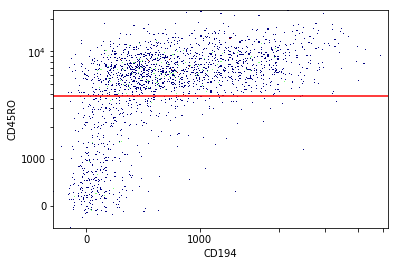

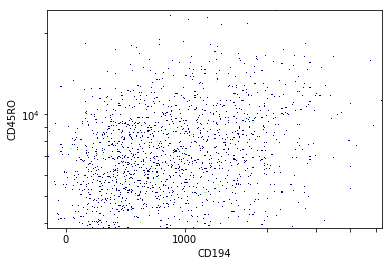

After gating, 2059 out of 2747 events remain.


In [234]:
CD45ROposTregs=ag.gateThreshold(fcs(),"CD194","CD45RO",vI=Tregs,thresh=ylim,orientation='horisontal',scale='logish',population='upper')